In [81]:
from typing import List
import pickle
import pandas as pd
import numpy as np

def read_results(tasks: List[str], data_sources: List[str], mask_ratios: List[str], context_type,):
    
    all_ans_paths = []
    for task in tasks:
        if task != 'continue_conversation':
            for data_source in data_sources:
                for mask_ratio in mask_ratios:
                    if data_source == 'news' or data_source == 'conversation':
                        ans_path = f'/vol/research/lyc/llm_memorize/answer_{task}_{data_source}_{mask_ratio}.pkl'
                    elif data_source == 'arxiv':
                        ans_path = f'/vol/research/lyc/llm_memorize/{"arxiv_buggy/" if context_type == "Random-phrase" else ""}answer_{task}_{data_source}_{mask_ratio}.pkl'
                    all_ans_paths.append(ans_path)
        else:
            for mask_ratio in mask_ratios:
                ans_path = f'/vol/research/lyc/llm_memorize/answer_{task}_conversation_{mask_ratio}.pkl'
                all_ans_paths.append(ans_path)
    
    results = []
    for ans_path in all_ans_paths:
        print(ans_path)

        with open(ans_path, 'rb') as f:
            ans = pickle.load(f)
        
        r = ans.metrics[context_type]
        if 'precision' in r:
            r['bertscore_precision'] = np.mean(r['precision'])
            r['bertscore_recall'] = np.mean(r['recall'])
            r['bertscore_f1'] = np.mean(r['f1'])
        results.append(r)
    
    df = pd.DataFrame(results)
    df = df[['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL', 'bertscore_precision', 'bertscore_recall', 'bertscore_f1']]
    avg_results = df.mean()

    return avg_results

def main(context_type):
    tasks = ['summarisation', 'qa', 'continue_conversation']
    data_sources = ['news', 'arxiv']
    mask_ratios = [0.2, 0.35, 0.5, 0.65, 0.8]
    
    all_results = {}
    for ratio in mask_ratios:
        avg_results = read_results(tasks=tasks, data_sources=data_sources, mask_ratios=[ratio], context_type=context_type)
        print(avg_results)
        all_results[ratio] = avg_results
    
    df = pd.DataFrame.from_dict(all_results, orient='index')
    print(df)


In [ ]:
main('self-info-phrase')

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_arxiv_0.2.pkl
bleu                   0.338213
meteor                 0.538121
rouge1                 0.600475
rouge2                 0.403870
rougeL                 0.503196
bertscore_precision    0.921442
bertscore_recall       0.918918
bertscore_f1           0.919934
dtype: float64
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.35.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.35.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.35.pkl
/vol/research/lyc/llm_memorize/answer_qa_arxiv_0.35.pkl
bleu                   0.274563
meteor                 0.486238
rouge1                 0.555487
rouge2                 0.342426
rougeL                 0.451110
bertscore_precision    0.914710
bertscore_recall       0.910022
bertscore_f1         

In [ ]:
main('Random-phrase')

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_summarisation_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_qa_arxiv_0.2.pkl
bleu                   0.300253
meteor                 0.505019
rouge1                 0.565778
rouge2                 0.365003
rougeL                 0.465813
bertscore_precision    0.916364
bertscore_recall       0.913181
bertscore_f1           0.914541
dtype: float64
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.35.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_summarisation_arxiv_0.35.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.35.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_qa_arxiv_0.35.pkl
bleu                   0.229359
meteor                 0.438959
rouge1                 0.513204
rouge2                 0.300784
rougeL                 0.407753
bertscore_precision    0.908544
berts

In [ ]:
main('no2-phrase')

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_arxiv_0.2.pkl
bleu                   0.397942
meteor                 0.568158
rouge1                 0.627156
rouge2                 0.447092
rougeL                 0.537445
bertscore_precision    0.926250
bertscore_recall       0.923912
bertscore_f1           0.924843
dtype: float64
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.35.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.35.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.35.pkl
/vol/research/lyc/llm_memorize/answer_qa_arxiv_0.35.pkl
bleu                   0.404397
meteor                 0.571271
rouge1                 0.627033
rouge2                 0.450404
rougeL                 0.539091
bertscore_precision    0.925827
bertscore_recall       0.925301
bertscore_f1         

In [59]:
def main(context_type):
    tasks = ['summarisation', 'qa', 'conversation']
    data_sources = ['news', 'arxiv',]
    mask_ratios = [0.2, 0.35, 0.5, 0.65, 0.8]
    
    all_results = []
    for ratio in mask_ratios:
        ratio_results = []
        method = f"SC-{ratio}"
        for task in tasks:
            if task == 'conversation':
                avg_results = read_results(tasks=['continue_conversation'], data_sources=['conversation'], mask_ratios=[ratio], context_type=context_type)
            else:
                avg_results = read_results(tasks=[task], data_sources=data_sources, mask_ratios=[ratio], context_type=context_type)
            avg_results['Method'] = method
            avg_results['Task'] = task
            avg_r = avg_results.to_frame().T.set_index(['Method', 'Task'])
            print(ratio, '----', task)
            print(avg_r)
            ratio_results.append(avg_r)
        print(ratio, '*****')
        df = pd.concat(ratio_results)
        print(df)
        ratio_avg = df.mean()
        ratio_avg.name
        df.loc[(method, 'avg'), :] = ratio_avg
        print(df, "^^^^^^^^^^")
        all_results.append(df)
    
    df = pd.concat(all_results, axis=0)
    print(df)
    return df

In [61]:
df = main('self-info-phrase')

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.2.pkl
0.2 ---- summarisation
                          bleu    meteor    rouge1   rouge2   rougeL   
Method Task                                                            
SC-0.2 summarisation  0.250841  0.475447  0.563191  0.30529  0.40152  \

                     bertscore_precision bertscore_recall bertscore_f1  
Method Task                                                             
SC-0.2 summarisation            0.909949         0.908858     0.909311  
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_arxiv_0.2.pkl
0.2 ---- qa
                 bleu    meteor   rouge1   rouge2    rougeL   
Method Task                                                   
SC-0.2 qa    0.425585  0.600796  0.63776  0.50245  0.604871  \

            bertscore_precision bertscore_recall bertscore_f1  
Method Task                        

In [43]:
import os

In [53]:
df.to_csv('/user/HS502/yl02706/LLMs_Memorize/self-info-phrase.csv')

In [67]:
def main(context_type):
    tasks = ['summarisation', 'qa', 'conversation']
    data_sources = ['news', 'arxiv']
    mask_ratios = [0.2, 0.35, 0.5, 0.65, 0.8]
    
    all_results = []
    method = f"Original"
    for task in tasks:
        if task == 'conversation':
            avg_results = read_results(tasks=['continue_conversation'], data_sources=['conversation'], mask_ratios=mask_ratios, context_type=context_type)
        else:
            avg_results = read_results(tasks=[task], data_sources=data_sources, mask_ratios=mask_ratios, context_type=context_type)
        avg_results['Method'] = method
        avg_results['Task'] = task
        avg_r = avg_results.to_frame().T.set_index(['Method', 'Task'])
        print(avg_r)
        all_results.append(avg_r)
    df = pd.concat(all_results)
    print(df)
    ratio_avg = df.mean()
    ratio_avg.name
    df.loc[(method, 'avg'), :] = ratio_avg
    print(df, "^^^^^^^^^^")
    # all_results.append(df)
    
    # df = pd.concat(all_results, axis=0)
    print(df)
    return df

In [68]:
df2 = main('no2-phrase')

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.35.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.5.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.65.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.8.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.35.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.5.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.65.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.8.pkl
                            bleu    meteor    rouge1    rouge2    rougeL   
Method   Task                                                              
Original summarisation  0.274409  0.481029  0.570123  0.320861  0.415909  \

                       bertscore_precision bertscore_recall bertscore_f1  
Method   Task                        

In [64]:
df

bleu    meteor    rouge1    rouge2    rougeL   
Method   Task                                                              
SC-0.2   summarisation  0.250841  0.475447  0.563191   0.30529   0.40152  \
         qa             0.425585  0.600796   0.63776   0.50245  0.604871   
         avg            0.338213  0.538121  0.600475   0.40387  0.503196   
SC-0.35  summarisation  0.212252   0.44154   0.53342   0.26467  0.363288   
         qa             0.336874  0.530936  0.577555  0.420181  0.538933   
         avg            0.274563  0.486238  0.555487  0.342426   0.45111   
SC-0.5   summarisation  0.169654  0.396712  0.499563  0.225521  0.330514   
         qa              0.23681  0.434079  0.487156  0.321347  0.447148   
         avg            0.203232  0.415395   0.49336  0.273434  0.388831   
SC-0.65  summarisation  0.114216  0.335057  0.447294  0.168204  0.281251   
         qa             0.156616   0.33626  0.393969  0.226806  0.353344   
         avg            0.135416  0.335659  0.420632  0.197505  0.317297   
SC-0.8   summarisation  0.063257  0.259203  0.380042  0.113503  0.230875   
         qa             0.116997  0.272458  0.326116  0.172215  0.289288   
         avg            0.090127  0.265831  0.353079  0.142859  0.260082   
Original avg             0.20831  0.408249  0.484607  0.272019  0.384103   

                       bertscore_precision bertscore_recall bertscore_f1  
Method   Task                                                             
SC-0.2   summarisation            0.909949         0.908858     0.909311  
         qa                       0.932936         0.928977     0.930556  
         avg                      0.921442         0.918918     0.919934  
SC-0.35  summarisation            0.904798         0.902061     0.903346  
         qa                       0.924622         0.917982     0.920897  
         avg                       0.91471         0.910022     0.912121  
SC-0.5   summarisation            0.899796         0.893081     0.896341  
         qa                       0.911766          0.90288     0.906915  
         avg                      0.905781          0.89798     0.901628  
SC-0.65  summarisation            0.892631         0.880073     0.886208  
         qa                       0.898988         0.887502     0.892811  
         avg                       0.89581         0.883788     0.889509  
SC-0.8   summarisation            0.883945         0.862788     0.873159  
         qa                       0.889909         0.876244     0.882656  
         avg                      0.886927         0.869516     0.877907  
Original avg                      0.904934         0.896045      0.90022

In [65]:
df.drop(index=('Original', 'avg'), inplace=True)

In [66]:
df

bleu    meteor    rouge1    rouge2    rougeL   
Method  Task                                                              
SC-0.2  summarisation  0.250841  0.475447  0.563191   0.30529   0.40152  \
        qa             0.425585  0.600796   0.63776   0.50245  0.604871   
        avg            0.338213  0.538121  0.600475   0.40387  0.503196   
SC-0.35 summarisation  0.212252   0.44154   0.53342   0.26467  0.363288   
        qa             0.336874  0.530936  0.577555  0.420181  0.538933   
        avg            0.274563  0.486238  0.555487  0.342426   0.45111   
SC-0.5  summarisation  0.169654  0.396712  0.499563  0.225521  0.330514   
        qa              0.23681  0.434079  0.487156  0.321347  0.447148   
        avg            0.203232  0.415395   0.49336  0.273434  0.388831   
SC-0.65 summarisation  0.114216  0.335057  0.447294  0.168204  0.281251   
        qa             0.156616   0.33626  0.393969  0.226806  0.353344   
        avg            0.135416  0.335659  0.420632  0.197505  0.317297   
SC-0.8  summarisation  0.063257  0.259203  0.380042  0.113503  0.230875   
        qa             0.116997  0.272458  0.326116  0.172215  0.289288   
        avg            0.090127  0.265831  0.353079  0.142859  0.260082   

                      bertscore_precision bertscore_recall bertscore_f1  
Method  Task                                                             
SC-0.2  summarisation            0.909949         0.908858     0.909311  
        qa                       0.932936         0.928977     0.930556  
        avg                      0.921442         0.918918     0.919934  
SC-0.35 summarisation            0.904798         0.902061     0.903346  
        qa                       0.924622         0.917982     0.920897  
        avg                       0.91471         0.910022     0.912121  
SC-0.5  summarisation            0.899796         0.893081     0.896341  
        qa                       0.911766          0.90288     0.906915  
        avg                      0.905781          0.89798     0.901628  
SC-0.65 summarisation            0.892631         0.880073     0.886208  
        qa                       0.898988         0.887502     0.892811  
        avg                       0.89581         0.883788     0.889509  
SC-0.8  summarisation            0.883945         0.862788     0.873159  
        qa                       0.889909         0.876244     0.882656  
        avg                      0.886927         0.869516     0.877907

In [68]:
pd.concat([df2, df])

bleu    meteor    rouge1    rouge2    rougeL   
Method   Task                                                              
Original summarisation  0.274409  0.481029  0.570123  0.320861  0.415909  \
         qa             0.529153  0.664327  0.690414  0.580545  0.664041   
         avg            0.401781  0.572678  0.630269  0.450703  0.539975   
SC-0.2   summarisation  0.250841  0.475447  0.563191   0.30529   0.40152   
         qa             0.425585  0.600796   0.63776   0.50245  0.604871   
         avg            0.338213  0.538121  0.600475   0.40387  0.503196   
SC-0.35  summarisation  0.212252   0.44154   0.53342   0.26467  0.363288   
         qa             0.336874  0.530936  0.577555  0.420181  0.538933   
         avg            0.274563  0.486238  0.555487  0.342426   0.45111   
SC-0.5   summarisation  0.169654  0.396712  0.499563  0.225521  0.330514   
         qa              0.23681  0.434079  0.487156  0.321347  0.447148   
         avg            0.203232  0.415395   0.49336  0.273434  0.388831   
SC-0.65  summarisation  0.114216  0.335057  0.447294  0.168204  0.281251   
         qa             0.156616   0.33626  0.393969  0.226806  0.353344   
         avg            0.135416  0.335659  0.420632  0.197505  0.317297   
SC-0.8   summarisation  0.063257  0.259203  0.380042  0.113503  0.230875   
         qa             0.116997  0.272458  0.326116  0.172215  0.289288   
         avg            0.090127  0.265831  0.353079  0.142859  0.260082   

                       bertscore_precision bertscore_recall bertscore_f1  
Method   Task                                                             
Original summarisation            0.911778         0.910969     0.911284  
         qa                        0.94126         0.938903     0.939685  
         avg                      0.926519         0.924936     0.925485  
SC-0.2   summarisation            0.909949         0.908858     0.909311  
         qa                       0.932936         0.928977     0.930556  
         avg                      0.921442         0.918918     0.919934  
SC-0.35  summarisation            0.904798         0.902061     0.903346  
         qa                       0.924622         0.917982     0.920897  
         avg                       0.91471         0.910022     0.912121  
SC-0.5   summarisation            0.899796         0.893081     0.896341  
         qa                       0.911766          0.90288     0.906915  
         avg                      0.905781          0.89798     0.901628  
SC-0.65  summarisation            0.892631         0.880073     0.886208  
         qa                       0.898988         0.887502     0.892811  
         avg                       0.89581         0.883788     0.889509  
SC-0.8   summarisation            0.883945         0.862788     0.873159  
         qa                       0.889909         0.876244     0.882656  
         avg                      0.886927         0.869516     0.877907

In [69]:
df2.loc[('Original', 'avg')] - df.loc[('SC-0.2', 'avg')]

bleu                   0.052395
meteor                 0.035678
rouge1                 0.030734
rouge2                 0.037546
rougeL                 0.032727
bertscore_precision    0.005177
bertscore_recall       0.009156
bertscore_f1           0.007139
dtype: object

In [70]:
new_sc = []
for index, line in df.iterrows():
    task = index[1]
    origin_r = df2.loc[('Original', task)]
    gap = origin_r - line
    new_line = {}
    for key, value in line.items():
        value = f"{value:.3f}"[1:]
        if 'bert' in key:
            gap_ = f"{gap[key]:.3f}"[1:]
        else:
            gap_ = f"{gap[key]:.2f}"[1:]
        new_line[key] = f"{value} ({gap_})"
    new_sc.append(pd.Series(new_line, name=index))
df = pd.concat(new_sc, axis=1).T
print(df)

                             bleu      meteor      rouge1      rouge2   
SC-0.2  summarisation  .251 (.02)  .475 (.01)  .563 (.01)  .305 (.02)  \
        qa             .426 (.10)  .601 (.06)  .638 (.05)  .502 (.08)   
        conversation   .208 (.03)  .305 (.04)  .419 (.03)  .230 (.02)   
        avg            .295 (.05)  .460 (.04)  .540 (.03)  .346 (.04)   
SC-0.35 summarisation  .212 (.06)  .442 (.04)  .533 (.04)  .265 (.06)   
        qa             .337 (.19)  .531 (.13)  .578 (.11)  .420 (.16)   
        conversation   .179 (.06)  .290 (.05)  .400 (.05)  .198 (.05)   
        avg            .243 (.10)  .421 (.08)  .504 (.07)  .294 (.09)   
SC-0.5  summarisation  .170 (.10)  .397 (.08)  .500 (.07)  .226 (.10)   
        qa             .237 (.29)  .434 (.23)  .487 (.20)  .321 (.26)   
        conversation   .132 (.11)  .254 (.09)  .360 (.09)  .163 (.09)   
        avg            .179 (.17)  .362 (.13)  .449 (.12)  .237 (.15)   
SC-0.65 summarisation  .114 (.16)  .335 (.15)  .447

In [71]:
new_sc = []
for index, line in df2.iterrows():
    task = index[1]
    new_line = {}
    for key, value in line.items():
        value = f"{value:.3f}"[1:]
        new_line[key] = f"{value}"
    new_sc.append(pd.Series(new_line, name=index))
df2 = pd.concat(new_sc, axis=1).T
print(df2)

                        bleu meteor rouge1 rouge2 rougeL bertscore_precision   
Original summarisation  .274   .481   .570   .321   .416                .912  \
         qa             .529   .664   .690   .581   .664                .941   
         conversation   .238   .343   .451   .249   .332                .878   
         avg            .347   .496   .571   .383   .471                .910   

                       bertscore_recall bertscore_f1  
Original summarisation             .911         .911  
         qa                        .939         .940  
         conversation              .878         .877  
         avg                       .909         .909  


In [72]:
pd.concat([df2, df])

bleu      meteor      rouge1      rouge2   
Original summarisation        .274        .481        .570        .321  \
         qa                   .529        .664        .690        .581   
         conversation         .238        .343        .451        .249   
         avg                  .347        .496        .571        .383   
SC-0.2   summarisation  .251 (.02)  .475 (.01)  .563 (.01)  .305 (.02)   
         qa             .426 (.10)  .601 (.06)  .638 (.05)  .502 (.08)   
         conversation   .208 (.03)  .305 (.04)  .419 (.03)  .230 (.02)   
         avg            .295 (.05)  .460 (.04)  .540 (.03)  .346 (.04)   
SC-0.35  summarisation  .212 (.06)  .442 (.04)  .533 (.04)  .265 (.06)   
         qa             .337 (.19)  .531 (.13)  .578 (.11)  .420 (.16)   
         conversation   .179 (.06)  .290 (.05)  .400 (.05)  .198 (.05)   
         avg            .243 (.10)  .421 (.08)  .504 (.07)  .294 (.09)   
SC-0.5   summarisation  .170 (.10)  .397 (.08)  .500 (.07)  .226 (.10)   
         qa             .237 (.29)  .434 (.23)  .487 (.20)  .321 (.26)   
         conversation   .132 (.11)  .254 (.09)  .360 (.09)  .163 (.09)   
         avg            .179 (.17)  .362 (.13)  .449 (.12)  .237 (.15)   
SC-0.65  summarisation  .114 (.16)  .335 (.15)  .447 (.12)  .168 (.15)   
         qa             .157 (.37)  .336 (.33)  .394 (.30)  .227 (.35)   
         conversation   .109 (.13)  .227 (.12)  .331 (.12)  .139 (.11)   
         avg            .127 (.22)  .299 (.20)  .391 (.18)  .178 (.21)   
SC-0.8   summarisation  .063 (.21)  .259 (.22)  .380 (.19)  .114 (.21)   
         qa             .117 (.41)  .272 (.39)  .326 (.36)  .172 (.41)   
         conversation   .030 (.21)  .142 (.20)  .227 (.22)  .081 (.17)   
         avg            .070 (.28)  .224 (.27)  .311 (.26)  .122 (.26)   

                            rougeL bertscore_precision bertscore_recall   
Original summarisation        .416                .912             .911  \
         qa                   .664                .941             .939   
         conversation         .332                .878             .878   
         avg                  .471                .910             .909   
SC-0.2   summarisation  .402 (.01)         .910 (.002)      .909 (.002)   
         qa             .605 (.06)         .933 (.008)      .929 (.010)   
         conversation   .307 (.02)         .873 (.005)      .862 (.015)   
         avg            .438 (.03)         .905 (.005)      .900 (.009)   
SC-0.35  summarisation  .363 (.05)         .905 (.007)      .902 (.009)   
         qa             .539 (.13)         .925 (.017)      .918 (.021)   
         conversation   .285 (.05)         .871 (.007)      .861 (.016)   
         avg            .396 (.07)         .900 (.010)      .894 (.015)   
SC-0.5   summarisation  .331 (.09)         .900 (.012)      .893 (.018)   
         qa             .447 (.22)         .912 (.029)      .903 (.036)   
         conversation   .254 (.08)         .867 (.012)      .850 (.028)   
         avg            .344 (.13)         .893 (.018)      .882 (.027)   
SC-0.65  summarisation  .281 (.13)         .893 (.019)      .880 (.031)   
         qa             .353 (.31)         .899 (.042)      .888 (.051)   
         conversation   .225 (.11)         .864 (.014)      .843 (.034)   
         avg            .287 (.18)         .885 (.025)      .870 (.039)   
SC-0.8   summarisation  .231 (.19)         .884 (.028)      .863 (.048)   
         qa             .289 (.37)         .890 (.051)      .876 (.063)   
         conversation   .154 (.18)         .849 (.029)      .816 (.061)   
         avg            .225 (.25)         .874 (.036)      .852 (.057)   

                       bertscore_f1  
Original summarisation         .911  
         qa                    .940  
         conversation          .877  
         avg                   .909  
SC-0.2   summarisation  .909 (.002)  
         qa             .931 (.009)  
         conversation   .867 (.010)  

In [73]:
print(pd.concat([df2, df]).to_latex())

\begin{tabular}{llllllllll}
\toprule
 &  & bleu & meteor & rouge1 & rouge2 & rougeL & bertscore_precision & bertscore_recall & bertscore_f1 \\
\midrule
\multirow[t]{4}{*}{Original} & summarisation & .274 & .481 & .570 & .321 & .416 & .912 & .911 & .911 \\
 & qa & .529 & .664 & .690 & .581 & .664 & .941 & .939 & .940 \\
 & conversation & .238 & .343 & .451 & .249 & .332 & .878 & .878 & .877 \\
 & avg & .347 & .496 & .571 & .383 & .471 & .910 & .909 & .909 \\
\cline{1-10}
\multirow[t]{4}{*}{SC-0.2} & summarisation & .251 (.02) & .475 (.01) & .563 (.01) & .305 (.02) & .402 (.01) & .910 (.002) & .909 (.002) & .909 (.002) \\
 & qa & .426 (.10) & .601 (.06) & .638 (.05) & .502 (.08) & .605 (.06) & .933 (.008) & .929 (.010) & .931 (.009) \\
 & conversation & .208 (.03) & .305 (.04) & .419 (.03) & .230 (.02) & .307 (.02) & .873 (.005) & .862 (.015) & .867 (.010) \\
 & avg & .295 (.05) & .460 (.04) & .540 (.03) & .346 (.04) & .438 (.03) & .905 (.005) & .900 (.009) & .902 (.007) \\
\cline{1-10}


In [84]:
def main(context_type):
    tasks = ['summarisation', 'qa', 'reconstruction', 'continue_conversation']
    data_sources = ['news', 'arxiv']
    mask_ratios = [0.2, 0.35, 0.5, 0.65, 0.8]
    
    all_results = []
    method = f"Original"
    for mask in mask_ratios:
        avg_results = read_results(tasks=tasks, data_sources=data_sources, mask_ratios=[mask], context_type=context_type)
        avg_results['Method'] = context_type
        avg_results['Ratio'] = mask
        avg_r = avg_results.to_frame().T.set_index(['Method', 'Ratio'])
        print(avg_r)
        all_results.append(avg_r)
    df = pd.concat(all_results)
    # print(df)
    # ratio_avg = df.mean()
    # ratio_avg.name
    # df.loc[(method, 'avg'), :] = ratio_avg
    # print(df, "^^^^^^^^^^")
    # all_results.append(df)
    
    # df = pd.concat(all_results, axis=0)
    print(df)
    return df

In [85]:
main('Random-phrase')

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_summarisation_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_qa_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_reconstruction_news_0.2.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_reconstruction_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_continue_conversation_conversation_0.2.pkl
                         bleu    meteor    rouge1    rouge2    rougeL   
Method        Ratio                                                     
Random-phrase 0.2    0.262573  0.445081  0.546325  0.373304  0.456221  \

                    bertscore_precision bertscore_recall bertscore_f1  
Method        Ratio                                                    
Random-phrase 0.2              0.906524         0.895404     0.900613  
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.35.pkl
/vol/res

bleu    meteor    rouge1    rouge2    rougeL   
Method        Ratio                                                     
Random-phrase 0.20   0.262573  0.445081  0.546325  0.373304  0.456221  \
              0.35   0.204083  0.389794  0.502501  0.310858   0.40331   
              0.50   0.144127  0.326061  0.445002  0.242286  0.339081   
              0.65    0.09829  0.272819  0.392123  0.183247  0.281424   
              0.80   0.065996  0.224821  0.336031   0.13592  0.231405   

                    bertscore_precision bertscore_recall bertscore_f1  
Method        Ratio                                                    
Random-phrase 0.20             0.906524         0.895404     0.900613  
              0.35             0.897925          0.88537     0.891307  
              0.50             0.886195         0.871476     0.878489  
              0.65             0.878118         0.861372     0.869352  
              0.80              0.87142         0.850001     0.860305

In [86]:
df = main('Random-phrase')
df2 = main('self-info-phrase')

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_summarisation_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_qa_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_reconstruction_news_0.2.pkl
/vol/research/lyc/llm_memorize/arxiv_buggy/answer_reconstruction_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_continue_conversation_conversation_0.2.pkl
                         bleu    meteor    rouge1    rouge2    rougeL   
Method        Ratio                                                     
Random-phrase 0.2    0.262573  0.445081  0.546325  0.373304  0.456221  \

                    bertscore_precision bertscore_recall bertscore_f1  
Method        Ratio                                                    
Random-phrase 0.2              0.906524         0.895404     0.900613  
/vol/research/lyc/llm_memorize/answer_summarisation_news_0.35.pkl
/vol/res

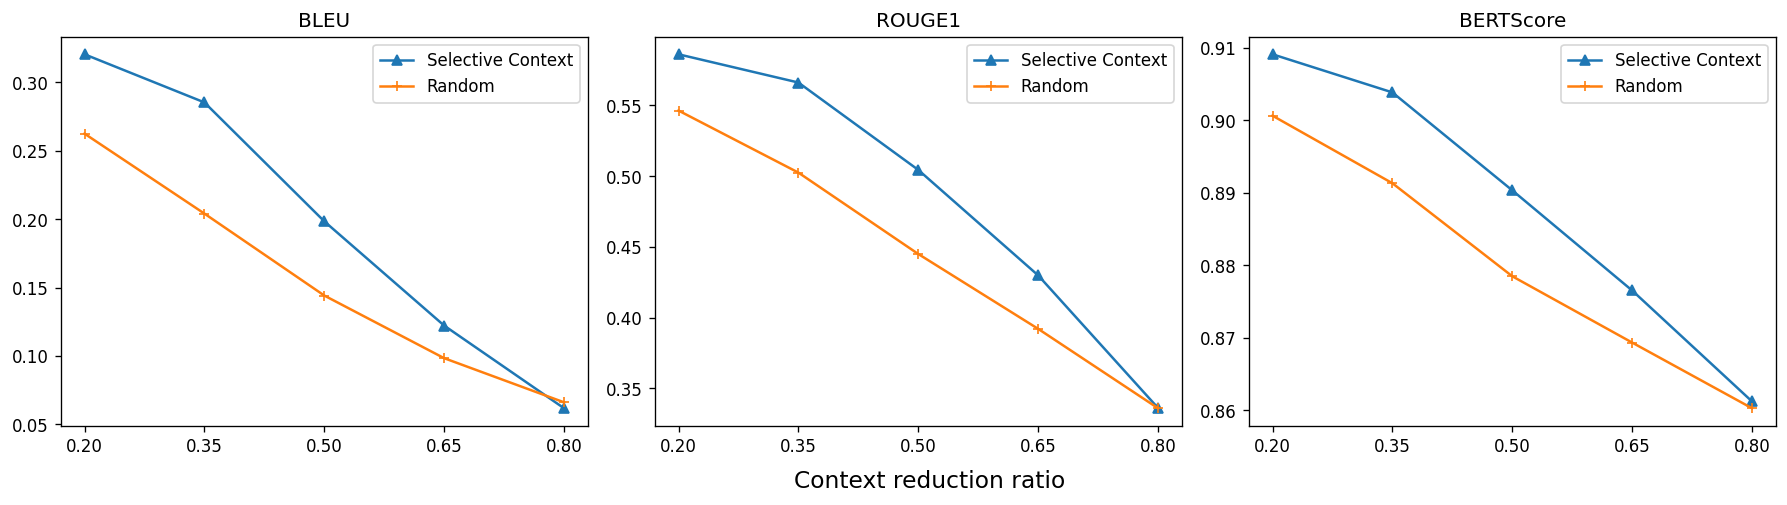

In [87]:
import matplotlib.pyplot as plt

df2 = df2.reset_index()
df = df.reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), dpi=120)
df2.plot(y='bleu', x='Ratio', ax=axes[0], marker='^', label = 'Selective Context')
df.plot(y='bleu', x='Ratio', ax=axes[0], marker='+', label = 'Random')
axes[0].set_title('BLEU')
axes[0].set_xlabel('')
axes[0].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])
# axes[0].set_xlabel('Filtered Ratio')

df2.plot(y='rouge1', x='Ratio', ax=axes[1], marker='^', label = 'Selective Context')
df.plot(y='rouge1', x='Ratio', ax=axes[1], marker='+', label = 'Random')
axes[1].set_title('ROUGE1')
axes[1].set_xlabel('')
axes[1].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])
# axes[1].set_ylim(0.2, 0.7)
# axes[1].set_xlabel('Filtered Ratio')

df2.plot(y='bertscore_f1', x='Ratio', ax=axes[2], marker='^', label = 'Selective Context')
df.plot(y='bertscore_f1', x='Ratio', ax=axes[2], marker='+', label = 'Random')
axes[2].set_title('BERTScore')
axes[2].set_xlabel('')
axes[2].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])
# axes[-1].set_xlabel('Filtered Ratio')
# axes[2].set_ylim(0.5, 1)
fig.text(0.52, -0.03, 'Context reduction ratio', ha='center', fontsize=14)
plt.tight_layout()

In [88]:
def task_wise(context_type):
    tasks = ['summarisation', 'qa', 'reconstruction', 'continue_conversation']
    data_sources = ['news', 'arxiv']
    mask_ratios = [0.2, 0.35, 0.5, 0.65, 0.8]
    
    all_results = []
    method = f"Original"
    for mask in mask_ratios:
        for task in tasks:
            avg_results = read_results(tasks=[task], data_sources=data_sources, mask_ratios=[mask], context_type=context_type)
            avg_results['Task'] = task
            avg_results['Ratio'] = mask
            avg_r = avg_results.to_frame().T.set_index(['Task', 'Ratio'])
            print(avg_r)
            all_results.append(avg_r)

    df = pd.concat(all_results)
    print(df)
    return df

In [97]:
def data_wise(context_type):
    tasks = ['summarisation', 'qa', 'reconstruction',]
    data_sources = ['news', 'arxiv', 'conversation']
    mask_ratios = [0.2, 0.35, 0.5, 0.65, 0.8]
    
    all_results = []
    method = f"Original"
    for mask in mask_ratios:
        for data_source in data_sources:
            if data_source == 'conversation':
                avg_results = read_results(tasks=['continue_conversation'], data_sources=[data_source], mask_ratios=[mask], context_type=context_type)
            else:
                avg_results = read_results(tasks=tasks, data_sources=[data_source], mask_ratios=[mask], context_type=context_type)
            avg_results['Data'] = data_source
            avg_results['Ratio'] = mask
            avg_r = avg_results.to_frame().T.set_index(['Data', 'Ratio'])
            print(avg_r)
            all_results.append(avg_r)

    df = pd.concat(all_results)
    print(df)
    return df

In [98]:
data_wise('self-info-phrase')
# task_wise('self-info-phrase')

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_reconstruction_news_0.2.pkl
                bleu    meteor   rouge1    rouge2    rougeL   
Data Ratio                                                    
news 0.2    0.311372  0.520609  0.61579  0.446994  0.519353  \

           bertscore_precision bertscore_recall bertscore_f1  
Data Ratio                                                    
news 0.2               0.92408         0.911869     0.917607  
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_reconstruction_arxiv_0.2.pkl
                 bleu    meteor    rouge1    rouge2    rougeL   
Data  Ratio                                                     
arxiv 0.2    0.367582  0.524821  0.612158  0.453074  0.537807  \

            bertscore_precision bertscore_recall ber

,,bleu,meteor,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1
Data,Ratio,,,,,,,,
news,0.20,0.311372,0.520609,0.61579,0.446994,0.519353,0.92408,0.911869,0.917607
arxiv,0.20,0.367582,0.524821,0.612158,0.453074,0.537807,0.918764,0.910758,0.91452
conversation,0.20,0.207521,0.304855,0.418755,0.229935,0.307005,0.87294,0.862254,0.867123
news,0.35,0.262851,0.484804,0.584836,0.402325,0.488802,0.918672,0.905732,0.911838
arxiv,0.35,0.343591,0.501076,0.602851,0.42069,0.519505,0.913046,0.904356,0.908496
conversation,0.35,0.178642,0.290323,0.399894,0.19813,0.285097,0.871131,0.86125,0.865733
news,0.50,0.209882,0.427233,0.539587,0.331607,0.435659,0.905746,0.893776,0.899471
arxiv,0.50,0.209169,0.393897,0.517496,0.317866,0.424837,0.898331,0.886316,0.892096
conversation,0.50,0.131888,0.253932,0.359615,0.162742,0.25384,0.866747,0.849633,0.857585


/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.2.pkl
                         bleu    meteor    rouge1   rouge2   rougeL   
Task          Ratio                                                   
summarisation 0.2    0.250841  0.475447  0.563191  0.30529  0.40152  \

                    bertscore_precision bertscore_recall bertscore_f1  
Task          Ratio                                                    
summarisation 0.2              0.909949         0.908858     0.909311  
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_arxiv_0.2.pkl
                bleu    meteor   rouge1   rouge2    rougeL   
Task Ratio                                                   
qa   0.2    0.425585  0.600796  0.63776  0.50245  0.604871  \

           bertscore_precision bertscore_recall bertscore_f1  
Task Ratio                                                    
qa   0.2         

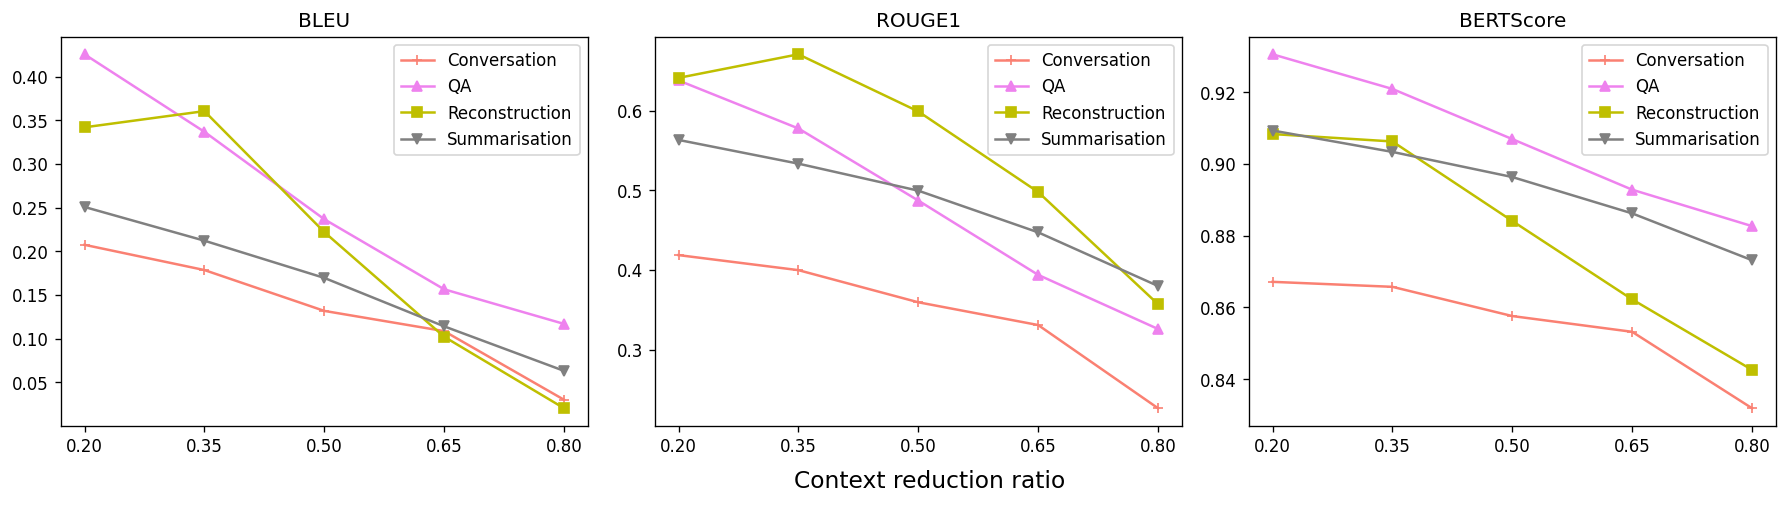

In [106]:
import matplotlib.pyplot as plt

df = task_wise('self-info-phrase')
df = df.reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), dpi=120)

markers = {
    'Conversation': '+',
    'Reconstruction': 's',
    'Summarisation': 'v',
    'QA': '^',
}

colors = {
    'Conversation': 'salmon',
    'Reconstruction': 'y',
    'Summarisation': 'grey',
    'QA': 'violet',
}

for task_name, group in df.groupby('Task'):
    if task_name == 'continue_conversation':
        task_name = 'Conversation'
    if task_name == 'reconstruction':
        task_name = 'Reconstruction'
    if task_name == 'summarisation':
        task_name = 'Summarisation'
    if task_name == 'qa':
        task_name = 'QA'
    group.plot(y='bleu', x='Ratio', ax=axes[0], marker=markers[task_name], label = task_name, color=colors[task_name])
    group.plot(y='rouge1', x='Ratio', ax=axes[1], marker=markers[task_name], label = task_name, color=colors[task_name])
    group.plot(y='bertscore_f1', x='Ratio', ax=axes[2], marker=markers[task_name], label = task_name, color=colors[task_name])

axes[0].set_title('BLEU')
axes[0].set_xlabel('')
axes[0].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])

axes[1].set_title('ROUGE1')
axes[1].set_xlabel('')
axes[1].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])

axes[2].set_title('BERTScore')
axes[2].set_xlabel('')
axes[2].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])
fig.text(0.52, -0.03, 'Context reduction ratio', ha='center', fontsize=14)
plt.tight_layout()

/vol/research/lyc/llm_memorize/answer_summarisation_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_news_0.2.pkl
/vol/research/lyc/llm_memorize/answer_reconstruction_news_0.2.pkl
                bleu    meteor   rouge1    rouge2    rougeL   
Data Ratio                                                    
news 0.2    0.311372  0.520609  0.61579  0.446994  0.519353  \

           bertscore_precision bertscore_recall bertscore_f1  
Data Ratio                                                    
news 0.2               0.92408         0.911869     0.917607  
/vol/research/lyc/llm_memorize/answer_summarisation_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_qa_arxiv_0.2.pkl
/vol/research/lyc/llm_memorize/answer_reconstruction_arxiv_0.2.pkl
                 bleu    meteor    rouge1    rouge2    rougeL   
Data  Ratio                                                     
arxiv 0.2    0.367582  0.524821  0.612158  0.453074  0.537807  \

            bertscore_precision bertscore_recall ber

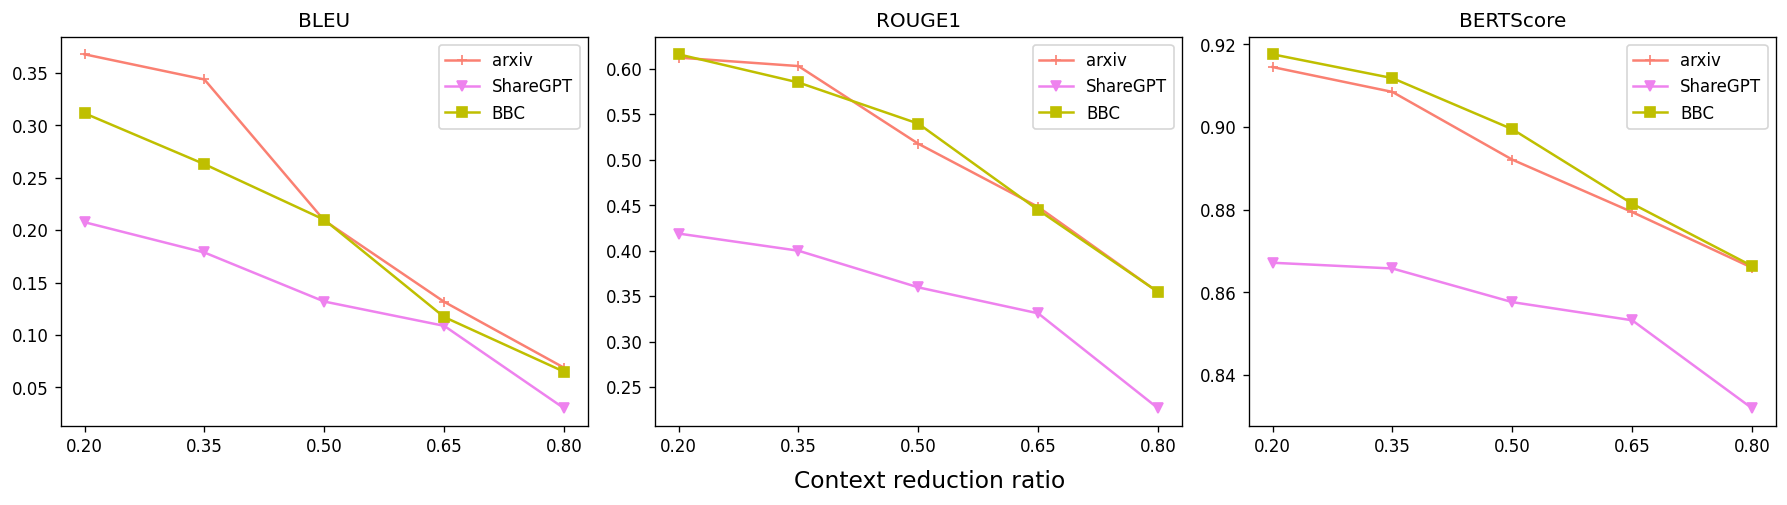

In [107]:
import matplotlib.pyplot as plt

df = data_wise('self-info-phrase')
df = df.reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), dpi=120)

markers = {
    'arxiv': '+',
    'BBC': 's',
    'ShareGPT': 'v',
}

colors = {
    'arxiv': 'salmon',
    'BBC': 'y',
    'ShareGPT': 'violet',
}

for data_source, group in df.groupby('Data'):
    if data_source == 'news':
        data_source = 'BBC'
    if data_source == 'conversation':
        data_source = 'ShareGPT'
    group.plot(y='bleu', x='Ratio', ax=axes[0], marker=markers[data_source], label = data_source, color=colors[data_source])
    group.plot(y='rouge1', x='Ratio', ax=axes[1], marker=markers[data_source], label = data_source, color=colors[data_source])
    group.plot(y='bertscore_f1', x='Ratio', ax=axes[2], marker=markers[data_source], label = data_source, color=colors[data_source])

axes[0].set_title('BLEU')
axes[0].set_xlabel('')
axes[0].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])

axes[1].set_title('ROUGE1')
axes[1].set_xlabel('')
axes[1].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])

axes[2].set_title('BERTScore')
axes[2].set_xlabel('')
axes[2].set_xticks([0.2, 0.35, 0.5, 0.65, 0.8])
fig.text(0.52, -0.03, 'Context reduction ratio', ha='center', fontsize=14)
plt.tight_layout()

In [108]:
with open('/vol/research/lyc/llm_memorize/news/NewsContextManager_sent.pkl', 'rb') as f:
    data = pickle.load(f)

In [7]:
print(data.articles[0].units[1])

LexicalUnits(unit_type='phrase', text=['\nhuman:', 'how', ' do', ' I', ' add', ' multiple new columns', ' in', ' m', ' for', ' power query', ' or', ' power', ' bi', '?', '\ngpt:', 'In', ' Power Query', ' or', ' Power BI', ',', ' you', ' can', ' add', ' multiple new columns', ' by', ' using', ' the "Add Column" menu', ' in', ' the Home tab', '.', 'Once', ' you', ' click', ' on', ' the "Add Column" menu', ',', ' you', ' will', ' see', ' options', ' to', ' add', ' a custom column', ',', ' index column', ',', ' and', ' more', '.', 'To', ' add', ' multiple new columns', ',', ' you', ' can', ' use', ' the "Custom Column" option', '.', 'You', ' can', ' also', ' use', ' "', 'Duplicate Column" option', ' to', ' duplicate', ' an existing column', ',', ' and', ' then', ' rename', ' the new column', ' as', ' desired', '.', 'Another way', ' to', ' add', ' multiple new columns', ' is', ' to', ' use', ' the "Add Columns" button', ' to', ' add', ' columns', ' from', ' a table', ',', ' then', ' rename'

In [1]:
import pickle

In [14]:
articles = []
for article in data.articles:
    prompt = ''
    for role, utterance in article.context[:-1]:
        prompt += f"{role}: {utterance}\n"
    prompt += 'gpt: '
    article.prompt = prompt
    articles.append(article)

In [20]:
articles[0].units[1].text

['\nhuman:',
 'how',
 ' do',
 ' I',
 ' add',
 ' multiple new columns',
 ' in',
 ' m',
 ' for',
 ' power query',
 ' or',
 ' power',
 ' bi',
 '?',
 '\ngpt:',
 'In',
 ' Power Query',
 ' or',
 ' Power BI',
 ',',
 ' you',
 ' can',
 ' add',
 ' multiple new columns',
 ' by',
 ' using',
 ' the "Add Column" menu',
 ' in',
 ' the Home tab',
 '.',
 'Once',
 ' you',
 ' click',
 ' on',
 ' the "Add Column" menu',
 ',',
 ' you',
 ' will',
 ' see',
 ' options',
 ' to',
 ' add',
 ' a custom column',
 ',',
 ' index column',
 ',',
 ' and',
 ' more',
 '.',
 'To',
 ' add',
 ' multiple new columns',
 ',',
 ' you',
 ' can',
 ' use',
 ' the "Custom Column" option',
 '.',
 'You',
 ' can',
 ' also',
 ' use',
 ' "',
 'Duplicate Column" option',
 ' to',
 ' duplicate',
 ' an existing column',
 ',',
 ' and',
 ' then',
 ' rename',
 ' the new column',
 ' as',
 ' desired',
 '.',
 'Another way',
 ' to',
 ' add',
 ' multiple new columns',
 ' is',
 ' to',
 ' use',
 ' the "Add Columns" button',
 ' to',
 ' add',
 ' columns

In [21]:
articles[0].units[1].self_info

[100,
 8.923297,
 2.7835639,
 3.2969732,
 4.2408676,
 5.5083641000000005,
 2.1812122,
 6.092323,
 9.432407,
 5.6864749,
 4.644773,
 4.225418,
 5.2081084,
 1.1441787,
 100,
 4.389775,
 8.1374215,
 5.8085074,
 1.5140522,
 0.5853059,
 0.9974583,
 0.2419288,
 3.7952552,
 3.914566833333333,
 3.499382,
 1.4617963,
 1.6427422266666667,
 3.4846764,
 1.9258636766666666,
 0.68230426,
 7.435318,
 1.936668,
 6.2944036,
 0.84273136,
 3.225192096666666,
 1.6033479,
 0.65989655,
 1.0479939,
 0.85310936,
 5.533309,
 1.1525933,
 0.83818835,
 2.1615184666666667,
 2.2659905,
 5.479189,
 0.28662822,
 1.7084305,
 4.669029,
 0.19248459,
 6.3401146,
 5.12454,
 5.442571833333333,
 1.5981535,
 1.8190339,
 1.0875775,
 1.277331,
 2.561001666666667,
 1.3922716,
 5.508232,
 1.8642259,
 3.380829,
 2.937686,
 5.375643,
 3.2929667933333335,
 1.2744807,
 2.276232,
 1.5325233,
 2.8537717,
 2.1259062,
 1.4018772,
 2.9336972,
 0.9356557799999999,
 2.3309643,
 3.0631785,
 0.17403154,
 5.96778445,
 0.5134649,
 5.0827,
 5.3

In [15]:
data.articles = articles

In [18]:
print(data.articles[2].prompt)

human: Poly Ether Ether Ketone
gpt: Poly Ether Ether Ketone (PEEK) is a high-performance engineering thermoplastic that is known for its excellent mechanical, thermal, and chemical properties. PEEK is a semi-crystalline polymer that is characterized by its high strength, stiffness, and toughness, as well as its excellent resistance to heat, chemicals, and abrasion. PEEK is widely used in various industries, including aerospace, automotive, medical, and oil and gas. It is used in applications that require high-performance materials, such as structural components, bearings, seals, and electrical insulation. One of the unique properties of PEEK is its ability to withstand high temperatures. It has a melting point of around 343°C (649°F) and can operate at temperatures up to 250°C (482°F) for long periods of time without losing its mechanical properties. PEEK is also highly resistant to chemicals and can withstand exposure to harsh environments without degrading. It is resistant to most or

In [19]:
with open('/vol/research/lyc/llm_memorize/conversation/ConversationContextManager_sent.pkl', 'wb') as f:
    pickle.dump(data, f)

In [22]:
from transformers import GPT2Tokenizer

In [23]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [25]:
import numpy as np

n_sent = []
n_phrase = []
n_token = []
for article in data.articles:
    n_sent.append(len(article.units[0].text))
    n_phrase.append(len(article.units[1].text))
    n_token.append(len(article.units[2].text))

print(np.mean(n_sent), np.mean(n_phrase), np.mean(n_token))

27.346534653465348 389.41584158415844 689.3168316831683


In [109]:
data.articles[2].units[1].text

['University',
 ' of',
 ' Edinburgh',
 ' student',
 ' Romy',
 ' Ulvestad',
 ' died',
 ' at',
 " her parents' London home",
 ' four',
 ' days',
 ' after',
 ' her 21st birthday',
 '.',
 'She',
 ' had',
 ' killed',
 ' herself',
 ' after',
 ' staff',
 ' failed',
 ' to',
 ' provide',
 ' additional support',
 ',',
 ' despite',
 ' repeated warnings',
 ' that',
 ' she',
 ' was',
 ' struggling',
 ' with',
 ' her mental health',
 '.',
 'Now',
 ' her mother',
 ' is',
 ' adding',
 ' her support',
 ' to',
 ' a campaign',
 ' for',
 ' the UK government',
 ' to',
 ' create',
 ' legal duty',
 ' of',
 ' care',
 ' for',
 ' students',
 '.',
 'The university',
 ',',
 ' which',
 ' apologised',
 ' for',
 ' failing Romy',
 ',',
 ' said',
 ' it',
 ' had',
 ' improved',
 ' the support',
 ' it',
 ' offers',
 ' since',
 ' her death',
 '.',
 'Libby Kitson',
 ',',
 " Romy's mother",
 ',',
 ' has',
 ' joined',
 ' calls',
 ' for',
 ' Westminster',
 ' to',
 ' change',
 ' the law',
 ' to',
 ' better',
 ' protect',
 ' s

In [47]:
def read_lexical_units(article, mask_level = 'phrase'):
    if mask_level == 'sent':
        lexical_units = article.units[0]
        assert lexical_units.unit_type == 'sent'
    elif mask_level == 'phrase':
        lexical_units = article.units[1]
        assert lexical_units.unit_type == 'phrase'
    elif mask_level == 'token':
        lexical_units = article.units[2]
        assert lexical_units.unit_type == 'token'

    tokens = lexical_units.text
    self_info = lexical_units.self_info
    new_self_info = [i for i in self_info if i != 100]
    # self_info = [x**1.2 for x in self_info]

    max_score = max(new_self_info)
    min_score = min(self_info)

    mid = np.percentile(self_info, 50)

    lines = []
    highlighted = []
    buffer = []
    for token, score in zip(tokens, self_info):
        if score == 100:
            lines.append(token)
            highlighted.append(token)
            continue
        normalized_score = ((score - min_score) / (max_score - min_score)) * 100
        line = f"\\colorize{{{normalized_score}}}{{{token}}}"
        if score > mid:
            highlighted.append(line)
            lines.append(line)
        else:
            token = f"\\sdelete{{{token}}}"
            line = f"\\colorize{{{normalized_score}}}{{{token}}}"
            lines.append(line)

    return '\n'.join(lines) + '\n\n\n' + '\n'.join(highlighted)

In [110]:
print(read_lexical_units(data.articles[2], mask_level = 'phrase'))

\colorize{60.457407703812116}{University}
\colorize{2.1659164753380376}{\sdelete{ of}}
\colorize{39.18128312793362}{ Edinburgh}
\colorize{40.9589778094108}{ student}
\colorize{42.183778727475435}{ Romy}
\colorize{40.15700491764415}{ Ulvestad}
\colorize{39.06025167513745}{ died}
\colorize{26.786787725140492}{ at}
\colorize{20.085639942990706}{ her parents' London home}
\colorize{41.68918976805701}{ four}
\colorize{10.03597654942884}{\sdelete{ days}}
\colorize{2.3817889494236595}{\sdelete{ after}}
\colorize{9.6403311919711}{\sdelete{ her 21st birthday}}
\colorize{9.46694401856072}{\sdelete{.}}
\colorize{45.47825276865044}{She}
\colorize{29.067922211898566}{ had}
\colorize{56.20448609818468}{ killed}
\colorize{20.441726675655065}{ herself}
\colorize{23.055039819628853}{ after}
\colorize{68.70521097319349}{ staff}
\colorize{21.92413100454727}{ failed}
\colorize{0.09019493549262621}{\sdelete{ to}}
\colorize{22.57557129376705}{ provide}
\colorize{36.01242053741374}{ additional support}
\colo